In [29]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Input
from keras.optimizers.legacy import Adam
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np

In [39]:
data = pd.read_csv("combined.csv")
data = data.drop("date.1", axis=1)
without_index = data.drop("date", axis=1)
without_index

,temperature,rain,wind_speed,wind_direction,humidity,pressure,total_cloud,visibility,solar_radiation
0,4.2,0.0,2.1,320.0,68.0,1021.5,0.0,20000.0,0.0
1,4.1,0.0,1.9,320.0,67.0,1021.4,0.0,20000.0,0.0
2,3.9,0.0,1.0,250.0,68.0,1021.7,0.0,20000.0,0.0
3,3.7,0.0,1.9,320.0,70.0,1021.6,0.0,20000.0,0.0
4,3.6,0.0,1.1,50.0,72.0,1020.7,0.0,17950.0,0.0
...,...,...,...,...,...,...,...,...,...
59562,18.7,0.0,1.8,180.0,72.0,15.5,2.0,4057.0,0.0
59563,16.4,0.0,0.7,200.0,84.0,15.6,3.0,3245.0,0.0
59564,14.4,0.0,0.5,70.0,88.0,14.4,6.0,2590.0,0.0
59565,13.0,0.0,0.1,0.0,92.0,13.7,5.0,1632.0,0.0


In [31]:
# data["date"] = pd.to_datetime(data["date"])
# data = data.set_index("date")
# data

In [32]:
scaler = MinMaxScaler(feature_range=(0, 1))

x1 = without_index[["total_cloud", "rain", "visibility", "humidity"]]
x2 = without_index[["total_cloud", "rain", "visibility", "humidity", "wind_speed", "wind_direction", "pressure", "temperature"]]
y = without_index["solar_radiation"]

datax1 = scaler.fit_transform(x1)
datax2 = scaler.fit_transform(x2)
datay = scaler.fit_transform(y.to_numpy().reshape(-1, 1))

In [33]:
# Train
time_steps = 48
features = 4

feature_array = datax1
dv_array = datay
feature_array.shape
dv_array.shape

(59567, 1)

In [34]:

# array = data["solar_radiation"].to_numpy()

num_sequence = len(feature_array) - time_steps

X1 = np.zeros((num_sequence, time_steps, features))
y1 = np.zeros(num_sequence)

for i in range(num_sequence):
    X1[i] = feature_array[i: i+time_steps]
    y1[i] = dv_array[i + time_steps]


/var/folders/td/8pk_dg054tl5dgjkt99r7wf80000gn/T/ipykernel_29026/3162236423.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y1[i] = dv_array[i + time_steps]


In [61]:
train_size =round(len(X1) * 0.7)

trainX = X1[:train_size]
trainy = y1[:train_size]

testX = X1[train_size:]
testy = y1[train_size:]

date_range_values = data[train_size:len(data)-48]["date"]
date_range_values


41663    2021-10-03 00:00:00
41664    2021-10-03 01:00:00
41665    2021-10-03 02:00:00
41666    2021-10-03 03:00:00
41667    2021-10-03 04:00:00
                ...         
59514    2023-10-16 19:00:00
59515    2023-10-16 20:00:00
59516    2023-10-16 21:00:00
59517    2023-10-16 22:00:00
59518    2023-10-16 23:00:00
Name: date, Length: 17856, dtype: object

In [66]:
yy = data[train_size:num_sequence]["solar_radiation"]
yy.index = date_range_values
yy


date
2021-10-03 00:00:00    0.0
2021-10-03 01:00:00    0.0
2021-10-03 02:00:00    0.0
2021-10-03 03:00:00    0.0
2021-10-03 04:00:00    0.0
                      ... 
2023-10-16 19:00:00    0.0
2023-10-16 20:00:00    0.0
2023-10-16 21:00:00    0.0
2023-10-16 22:00:00    0.0
2023-10-16 23:00:00    0.0
Name: solar_radiation, Length: 17856, dtype: float64

In [10]:
optimizer = Adam(learning_rate=0.0001)

model1 = Sequential()

model1.add(Input((48,4)))
model1.add(LSTM(10, activation="relu"))
model1.add(Dense(1))

model1.compile(loss="mse", optimizer=optimizer)

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                600       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 611 (2.39 KB)
Trainable params: 611 (2.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/3000
521/521 [==============================] - 4s 6ms/step - loss: 0.0612 - val_loss: 0.0650
Epoch 2/3000
521/521 [==============================] - 3s 6ms/step - loss: 0.0525 - val_loss: 0.0601
Epoch 3/3000
521/521 [==============================] - 3s 5ms/step - loss: 0.0506 - val_loss: 0.0586
Epoch 4/3000
521/521 [==============================] - 3s 5ms/step - loss: 0.0491 - val_loss: 0.0572
Epoch 5/3000
521/521 [==============================] - 3s 5ms/step - loss: 0.0474 - val_loss: 0.0553
Epoch 6/3000
521/521 [==============================] - 3s 5ms/step - loss: 0.0450 - val_loss: 0.0531
Epoch 7/3000
521/521 [==============================] - 3s 6ms/step - loss: 0.0418 - val_loss: 0.0501
Epoch 8/3000
521/521 [==============================] - 3s 7ms/step - loss: 0.0386 - val_loss: 0.0462
Epoch 9/3000
521/521 [==============================] - 3s 6ms/step - loss: 0.0363 - val_loss: 0.0425
Epoch 10/3000
521/521 [==============================] - 3s 5ms/step - loss: 0.034

<Axes: >

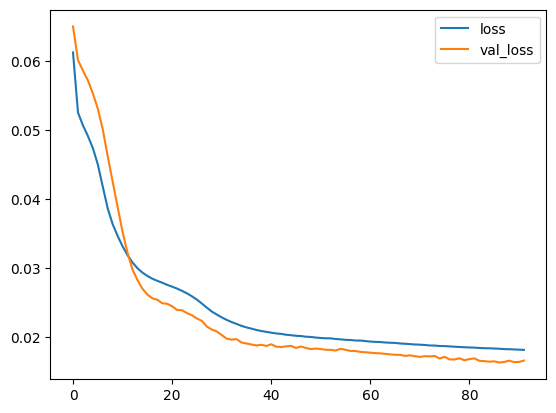

In [11]:
early_stopping = EarlyStopping(monitor="val_loss", patience=5, verbose=5, mode="auto")
trained = model1.fit(trainX, trainy, validation_split=0.2, batch_size=64, epochs=3000, callbacks = [early_stopping])
pd.DataFrame.from_dict(trained.history).plot()

In [12]:
loss = model1.evaluate(testX, testy)
print(f"Test loss: {loss}")

558/558 [==============================] - 1s 1ms/step - loss: 0.0166
Test loss: 0.01656733825802803


In [51]:
predicted1 = model1.predict(testX)
predicted1 = scaler.inverse_transform(predicted1)
predicted1

558/558 [==============================] - 1s 1ms/step


array([[-0.11924966],
       [-0.13378038],
       [-0.09549624],
       ...,
       [-0.13094641],
       [-0.19591196],
       [-0.22695236]], dtype=float32)

In [53]:
predicted1 = np.maximum(0, predicted1)
predicted1

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [69]:
pred_frame1 = pd.DataFrame(predicted1)
pred_frame1.index = date_range_values
pred_frame1

,0
date,
2021-10-03 00:00:00,0.000000
2021-10-03 01:00:00,0.000000
2021-10-03 02:00:00,0.000000
2021-10-03 03:00:00,0.000000
2021-10-03 04:00:00,0.000000
...,...
2023-10-16 19:00:00,0.186308
2023-10-16 20:00:00,0.088978
2023-10-16 21:00:00,0.000000


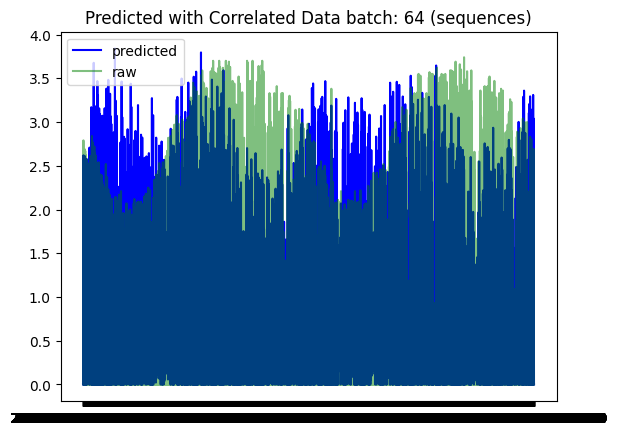

In [70]:
import matplotlib.pyplot as plt

plt.title("Predicted with Correlated Data batch: 64 (sequences)")
plt.plot(pred_frame1, c="b", label="predicted")
plt.plot( yy, c="g", alpha=.5, label="raw")
plt.legend(loc="best")
plt.show()

In [72]:
from sklearn.metrics import mean_squared_error

In [73]:
predicted1.shape

(17856, 1)

In [74]:
error = mean_squared_error(yy, predicted1)

print("MSE: {}, RMSE: {}".format(error, np.sqrt(error)))

MSE: 0.3543526093550245, RMSE: 0.5952752383183971


In [75]:
feature_array2 = datax2
dv_array2 = datay


In [86]:
time_steps = 48
features2 = 8

num_sequence2 = len(feature_array2) - time_steps

X2 = np.zeros((num_sequence2, time_steps, features2))
y2 = np.zeros(num_sequence2)

for i in range(num_sequence2):
    X2[i] = feature_array2[i: i+time_steps]
    y2[i] = dv_array2[i + time_steps]

/var/folders/td/8pk_dg054tl5dgjkt99r7wf80000gn/T/ipykernel_29026/3088642358.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y2[i] = dv_array2[i + time_steps]


In [87]:
train_size =round(len(X2) * 0.7)

trainX2 = X2[:train_size]
trainy2 = y2[:train_size]

testX2 = X2[train_size:]

testy2 = y2[train_size:]

In [88]:
optimizer = Adam(learning_rate=0.0001)

model2 = Sequential()

model2.add(Input((48,8)))
model2.add(LSTM(10, activation="relu"))
model2.add(Dense(1))

model2.compile(loss="mse", optimizer=optimizer)

model2.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 10)                760       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 771 (3.01 KB)
Trainable params: 771 (3.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/3000
521/521 [==============================] - 3s 5ms/step - loss: 1.2983 - val_loss: 0.1207
Epoch 2/3000
521/521 [==============================] - 3s 5ms/step - loss: 0.1972 - val_loss: 0.0877
Epoch 3/3000
521/521 [==============================] - 3s 5ms/step - loss: 0.1178 - val_loss: 0.0737
Epoch 4/3000
521/521 [==============================] - 3s 5ms/step - loss: 0.0692 - val_loss: 0.0674
Epoch 5/3000
521/521 [==============================] - 3s 5ms/step - loss: 0.0593 - val_loss: 0.0615
Epoch 6/3000
521/521 [==============================] - 3s 5ms/step - loss: 0.0537 - val_loss: 0.0562
Epoch 7/3000
521/521 [==============================] - 3s 5ms/step - loss: 0.0491 - val_loss: 0.0532
Epoch 8/3000
521/521 [==============================] - 3s 5ms/step - loss: 0.0465 - val_loss: 0.0512
Epoch 9/3000
521/521 [==============================] - 3s 5ms/step - loss: 0.0448 - val_loss: 0.0489
Epoch 10/3000
521/521 [==============================] - 3s 5ms/step - loss: 0.042

<Axes: >

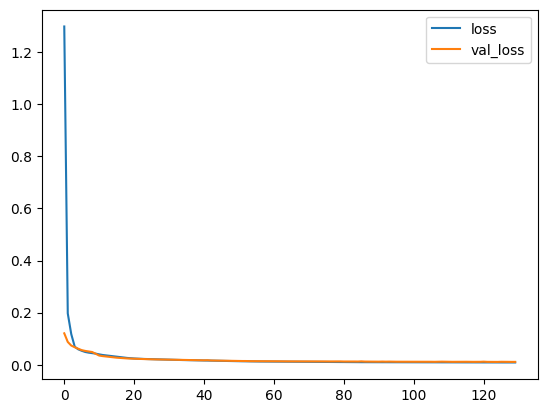

In [89]:
trained2 = model2.fit(trainX2, trainy2, validation_split=0.2, batch_size=64, epochs=3000, callbacks = [early_stopping])
pd.DataFrame.from_dict(trained2.history).plot()

In [90]:
loss2 = model2.evaluate(testX2, testy2)
print(f"Test loss: {loss2}")

558/558 [==============================] - 1s 1ms/step - loss: 0.0101
Test loss: 0.010138602927327156


In [91]:
result2 = model2.predict(testX2)
result2 = scaler.inverse_transform(result2)
result2

558/558 [==============================] - 1s 1ms/step


array([[ 0.06971031],
       [ 0.0848824 ],
       [ 0.15621985],
       ...,
       [-0.13796763],
       [-0.12386412],
       [-0.09705208]], dtype=float32)

In [92]:
result2 = np.maximum(0, result2)

result2

array([[0.06971031],
       [0.0848824 ],
       [0.15621985],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]], dtype=float32)

In [93]:
pred_frame2= pd.DataFrame(result2)
pred_frame2.index = date_range_values
pred_frame2

,0
date,
2021-10-03 00:00:00,0.069710
2021-10-03 01:00:00,0.084882
2021-10-03 02:00:00,0.156220
2021-10-03 03:00:00,0.094358
2021-10-03 04:00:00,0.093940
...,...
2023-10-16 19:00:00,0.000000
2023-10-16 20:00:00,0.063112
2023-10-16 21:00:00,0.000000


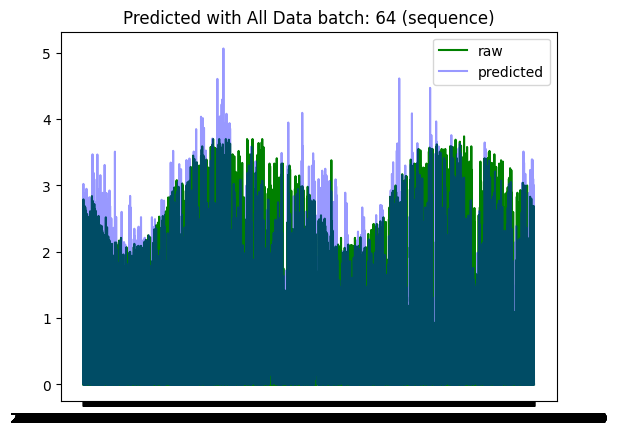

In [94]:
plt.title("Predicted with All Data batch: 64 (sequence)")
plt.plot(yy, c="g", label="raw")
plt.plot(pred_frame2, c="b", alpha=.4, label="predicted")
plt.legend(loc="best")
plt.show()

In [98]:
error2 = mean_squared_error(yy.values, result2)

print("MSE: {}, RMSE: {}".format(error2, np.sqrt(error2)))

MSE: 0.2984541046479232, RMSE: 0.5463095319028611


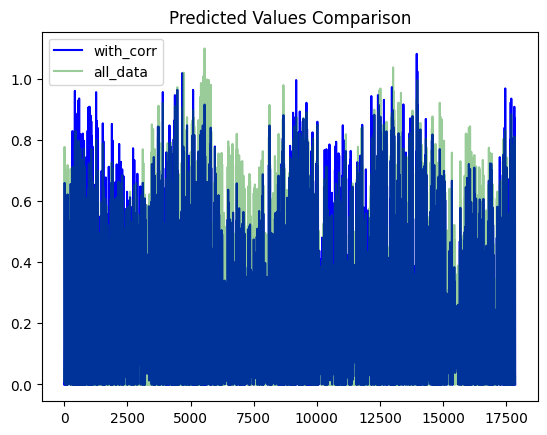

In [ ]:
import matplotlib.pyplot as plt

plt.title("Predicted Values Comparison")
plt.plot( predicted1, c="b", label="with_corr")
plt.plot(result2,c="g", label="all_data", alpha=.4)
plt.xticks()
plt.legend(loc="best")
plt.show()